In [ ]:
#Mounting the Goodgle Drive to access the drive contents
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install pydot


In [ ]:
pip install pydot_ng


In [ ]:
pip install graphviz

In [ ]:
pip install plot_model

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords #corpus is collection of text
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# load train data
train = pd.read_csv('/content/gdrive/MyDrive/Sachin : CAIR Internship/Datasets and Code/train.csv')
train.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# Find Na values
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# using dropna() function  
train = train.dropna()

In [ ]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
#Get the Depndent feature
X_train=train.drop('label',axis=1)
y_train=train['label']

In [ ]:
# set vocabulary size
vo_size=500
messages=X_train.copy()
messages.reset_index(inplace=True)

In [ ]:
# Dataset Preprocessing
ps =PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print("Status: %s / %s" %(i, len(messages)), end="\r")
    review = re.sub('[^a-zA-Z]', ' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
# one hot representation
onehot_rep = [one_hot(words, vo_size) for words in corpus]

In [ ]:
# pad_sequences
sent_length = 20
embedded_doc=pad_sequences(onehot_rep, padding='pre', maxlen=sent_length)
print(embedded_doc)

[[  0   0   0 ... 265 319  27]
 [  0   0   0 ... 240  52 435]
 [  0   0   0 ... 492 462  59]
 ...
 [  0   0   0 ... 401 215 382]
 [  0   0   0 ...  12 370 443]
 [  0   0   0 ... 110 197 195]]


In [ ]:
# model building 
embedding_vector_feature = 10
model=Sequential()
model.add(Embedding(vo_size,embedding_vector_feature,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 10)            5000      
_________________________________________________________________
lstm (LSTM)                  (None, 100)               44400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 49,501
Trainable params: 49,501
Non-trainable params: 0
_________________________________________________________________
None


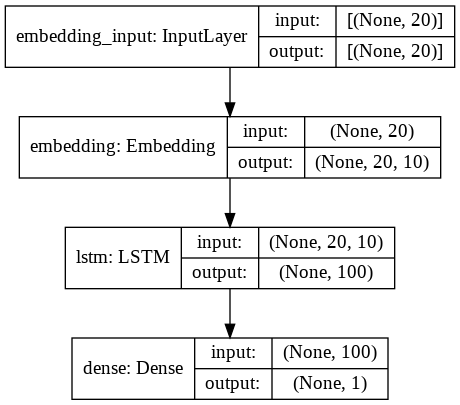

In [ ]:
# Plot title model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
# check shape 
len(embedded_doc),y_train.shape

(18285, (18285,))

In [ ]:
# final data for NN
X_final=np.array(embedded_doc)
y_final=np.array(y_train)
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [ ]:
# train model
history = model.fit(X_final,y_final, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
229/229 [==============================] - 10s 8ms/step - loss: 0.4164 - accuracy: 0.7944 - val_loss: 0.2583 - val_accuracy: 0.8928
Epoch 2/10
229/229 [==============================] - 1s 6ms/step - loss: 0.2212 - accuracy: 0.9050 - val_loss: 0.2400 - val_accuracy: 0.8999
Epoch 3/10
229/229 [==============================] - 1s 6ms/step - loss: 0.2044 - accuracy: 0.9137 - val_loss: 0.2379 - val_accuracy: 0.8969
Epoch 4/10
229/229 [==============================] - 1s 6ms/step - loss: 0.1940 - accuracy: 0.9190 - val_loss: 0.2383 - val_accuracy: 0.8955
Epoch 5/10
229/229 [==============================] - 1s 6ms/step - loss: 0.1835 - accuracy: 0.9218 - val_loss: 0.2490 - val_accuracy: 0.8895
Epoch 6/10
229/229 [==============================] - 1s 6ms/step - loss: 0.1789 - accuracy: 0.9262 - val_loss: 0.2490 - val_accuracy: 0.8917
Epoch 7/10
229/229 [==============================] - 1s 6ms/step - loss: 0.1721 - accuracy: 0.9277 - val_loss: 0.2431 - val_accuracy: 0.8966
Epoch

In [ ]:
# load test
test = pd.read_csv('/content/gdrive/MyDrive/Sachin : CAIR Internship/Datasets and Code/test.csv')
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
# check for na in test
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [ ]:
# using dropna() function  
test = test.dropna()

In [ ]:
# prepare test data for NN
X_test=test
messages=X_test.copy()
messages.reset_index(inplace=True)
ps =PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print("Status: %s / %s" %(i, len(messages)), end="\r")
    review = re.sub('[^a-zA-Z]', ' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
onehot_rep = [one_hot(words, vo_size) for words in corpus]
embedded_doc=pad_sequences(onehot_rep, padding='pre', maxlen=sent_length)
X_test_final=np.array(embedded_doc)

In [ ]:
# predict final
y_pred_final=model.predict_classes(X_test_final)
y_pred_final = pd.DataFrame(y_pred_final)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_pred_final =np.argmax(model.predict(X_test_final), axis=-1)
y_pred_final = pd.DataFrame(y_pred_final)

In [ ]:
#probability predictions
model.predict_proba(X_test_final[:5])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[1.3148824e-03],
       [1.7538624e-01],
       [2.2592176e-04],
       [9.8071772e-01],
       [2.3645116e-03]], dtype=float32)

In [ ]:
# Save model
model.save_weights("model_title.h5")

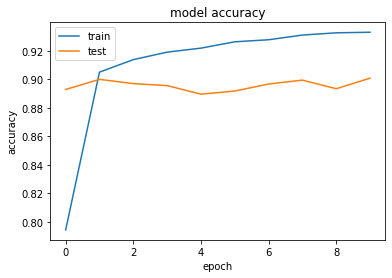

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

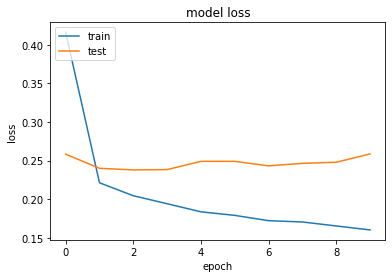

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pip install lime

     |████████████████████████████████| 276kB 7.2MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283858 sha256=302ada30c13e3a59d93a28ed9bbb3fd0175c2d920f739712cd37bd2fe4eeb413
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
#import lime
#from lime import lime_tabular

#explainer = lime_tabular.LimeTabularExplainer(
#    training_data=np.array(X_test_final),
#    feature_names=X_test_final,
#    class_names=['fake','real'],
#    mode ='classification'
#)

In [ ]:
#xp = explainer.explain_instance(
#    data_row=X_test_final[3], 
#    predict_fn=model.predict_proba
#)

#exp.show_in_notebook(show_table=True)

In [ ]:
#exp = interpretor.explain_instance(
#    data_row=X_test.iloc[5], ##new data
#    predict_fn= model.predict_proba
#)

#exp.show_in_notebook(show_table=True)